In [1]:
import numpy as np
import pandas as pd
import datetime
pd.set_option('display.max_rows', None)

In [2]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')


### Problem 1

In [3]:
covid_data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515


In [4]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 8 columns):
Province/State    126 non-null object
Country/Region    276 non-null object
Last Update       276 non-null object
Confirmed         276 non-null int64
Deaths            276 non-null int64
Recovered         276 non-null int64
Latitude          276 non-null float64
Longitude         276 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 17.3+ KB


In [5]:
covid_data.isna().sum()

Province/State    150
Country/Region      0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
Latitude            0
Longitude           0
dtype: int64

### Problem 2

In [6]:
covid_data['Last Update Time Stamp'] = covid_data['Last Update'].apply(lambda x: datetime.datetime.strptime(x.replace('T', ' '), '%Y-%m-%d %H:%M:%S'))


In [7]:
covid_data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Last Update Time Stamp
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707,2020-03-17 11:53:10
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674,2020-03-17 18:33:02
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880,2020-03-17 15:13:09
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492,2020-03-17 20:53:02
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515,2020-03-17 18:53:02


In [8]:
covid_data_latest_cases_country_wise = covid_data.loc[covid_data.groupby(['Country/Region'])['Last Update Time Stamp'].idxmax()]


In [9]:
covid_data_latest_cases_country_wise['Active'] = covid_data_latest_cases_country_wise['Confirmed'] - \
                                                   covid_data_latest_cases_country_wise['Deaths'] - \
                                                     covid_data_latest_cases_country_wise['Recovered'] 

In [10]:
covid_data_latest_cases_country_wise_required = covid_data_latest_cases_country_wise[['Country/Region', 'Confirmed', 
                                                                                      'Deaths', 'Recovered', 'Active']]


In [11]:
covid_data_latest_cases_country_wise_required

,Country/Region,Confirmed,Deaths,Recovered,Active
162,Afghanistan,20,0,1,19
123,Albania,55,1,0,54
117,Algeria,60,4,12,44
134,Andorra,39,0,1,38
241,Antigua and Barbuda,1,0,0,1
104,Argentina,68,2,3,63
92,Armenia,78,0,1,77
220,Aruba,3,0,0,3
89,Australia,94,0,8,86
13,Austria,1332,3,1,1328


### Problem 3

In [12]:
covid_data_latest_cases_country_state_wise = covid_data.loc[covid_data.groupby(['Country/Region', 'Province/State'])['Last Update Time Stamp'].idxmax()]


In [13]:
covid_data_latest_cases_country_state_wise

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Last Update Time Stamp
233,Australian Capital Territory,Australia,2020-03-16T14:38:46,2,0,0,-35.4735,149.0124,2020-03-16 14:38:46
270,From Diamond Princess,Australia,2020-03-14T02:33:04,0,0,0,35.4437,139.6380,2020-03-14 02:33:04
56,New South Wales,Australia,2020-03-17T12:33:07,210,4,4,-33.8688,151.2093,2020-03-17 12:33:07
242,Northern Territory,Australia,2020-03-14T01:53:03,1,0,0,-12.4634,130.8456,2020-03-14 01:53:03
93,Queensland,Australia,2020-03-17T12:33:07,78,0,8,-28.0167,153.4000,2020-03-17 12:33:07
148,South Australia,Australia,2020-03-16T14:38:46,29,0,3,-34.9285,138.6007,2020-03-16 14:38:46
201,Tasmania,Australia,2020-03-16T14:38:46,7,0,0,-41.4545,145.9707,2020-03-16 14:38:46
89,Victoria,Australia,2020-03-17T12:53:09,94,0,8,-37.8136,144.9631,2020-03-17 12:53:09
145,Western Australia,Australia,2020-03-17T12:53:09,31,1,0,-31.9505,115.8605,2020-03-17 12:53:09
98,Alberta,Canada,2020-03-17T03:13:18,74,0,0,53.9333,-116.5765,2020-03-17 03:13:18


In [14]:
covid_data_latest_cases_country_state_wise_required = covid_data_latest_cases_country_state_wise[['Country/Region', 'Province/State',
                                                                                                  'Confirmed', 'Deaths', 'Recovered']]



In [15]:
covid_data_latest_cases_country_state_wise_required

,Country/Region,Province/State,Confirmed,Deaths,Recovered
233,Australia,Australian Capital Territory,2,0,0
270,Australia,From Diamond Princess,0,0,0
56,Australia,New South Wales,210,4,4
242,Australia,Northern Territory,1,0,0
93,Australia,Queensland,78,0,8
148,Australia,South Australia,29,0,3
201,Australia,Tasmania,7,0,0
89,Australia,Victoria,94,0,8
145,Australia,Western Australia,31,1,0
98,Canada,Alberta,74,0,0


### Problem 4

In [16]:
covid_data_china = covid_data.loc[covid_data['Country/Region'] == 'China', ]

In [17]:
covid_data_china.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Last Update Time Stamp
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707,2020-03-17 11:53:10
12,Guangdong,China,2020-03-17T01:53:03,1364,8,1307,23.3417,113.4244,2020-03-17 01:53:03
14,Henan,China,2020-03-14T09:53:08,1273,22,1250,33.8820,113.6140,2020-03-14 09:53:08
16,Zhejiang,China,2020-03-17T02:13:21,1232,1,1216,29.1832,120.0934,2020-03-17 02:13:21
19,Hunan,China,2020-03-14T08:33:03,1018,4,1014,27.6104,111.7088,2020-03-14 08:33:03


In [18]:
covid_data_china_state_wise = covid_data_china[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]

In [19]:
covid_data_china_state_wise

,Province/State,Confirmed,Deaths,Recovered
0,Hubei,67799,3111,56003
12,Guangdong,1364,8,1307
14,Henan,1273,22,1250
16,Zhejiang,1232,1,1216
19,Hunan,1018,4,1014
20,Anhui,990,6,984
22,Jiangxi,935,1,934
24,Shandong,761,7,746
28,Jiangsu,631,0,631
29,Chongqing,576,6,570


### Problem 5

In [20]:
covid_data_country_wise_agg = covid_data.groupby('Country/Region')['Deaths'].sum().reset_index()

In [21]:
covid_data_country_wise_agg

,Country/Region,Deaths
0,Afghanistan,0
1,Albania,1
2,Algeria,4
3,Andorra,0
4,Antigua and Barbuda,0
5,Argentina,2
6,Armenia,0
7,Aruba,0
8,Australia,5
9,Austria,3


### Program 6

In [22]:
covid_data_recovered = covid_data.groupby('Country/Region')['Recovered'].sum().reset_index()
covid_data_zero_recovered = covid_data_recovered.loc[covid_data_recovered['Recovered'] == 0, ]

In [23]:
covid_data_zero_recovered

,Country/Region,Recovered
1,Albania,0
4,Antigua and Barbuda,0
7,Aruba,0
13,Barbados,0
16,Benin,0
17,Bhutan,0
18,Bolivia,0
21,Brunei,0
22,Bulgaria,0
23,Burkina Faso,0


### Problem 7

In [31]:
covid_data_group_country = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
covid_data_group_confirmed_deaths_equal = covid_data_group_country.loc[covid_data_group_country['Confirmed'] == covid_data_group_country['Deaths'], ]
covid_data_group_confirmed_deaths_equal = covid_data_group_confirmed_deaths_equal.loc[covid_data_group_confirmed_deaths_equal['Deaths'] > 0, ]


In [32]:
covid_data_group_confirmed_deaths_equal

,Country/Region,Confirmed,Deaths,Recovered
137,Sudan,1,1,0


### Problem 8

In [37]:
covid_data_group_country = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
covid_data_group_all_recovered = covid_data_group_country.loc[covid_data_group_country['Confirmed'] == covid_data_group_country['Recovered'], ]
covid_data_group_all_recovered = covid_data_group_all_recovered.loc[covid_data_group_all_recovered['Recovered'] > 0, ]


In [38]:
covid_data_group_all_recovered

,Country/Region,Confirmed,Deaths,Recovered
102,Nepal,1,0,1


### Problem 9

In [47]:
covid_data_top_10_confirmed_country_wise = covid_data.groupby('Country/Region').max().sort_values(by = 'Confirmed',
                                                                                                 ascending = False)[:10]

In [51]:
covid_data_top_10_confirmed_country_wise = covid_data_top_10_confirmed_country_wise[['Last Update', 
                                                                                     'Confirmed',
                                                                                     'Deaths',
                                                                                     'Recovered']]

In [52]:
covid_data_top_10_confirmed_country_wise

,Last Update,Confirmed,Deaths,Recovered
Country/Region,,,,
China,2020-03-17T12:13:13,67799,3111,56003
Italy,2020-03-17T18:33:02,31506,2503,2941
Iran,2020-03-17T15:13:09,16169,988,5389
Spain,2020-03-17T20:53:02,11748,533,1028
Germany,2020-03-17T18:53:02,9257,24,67
"Korea, South",2020-03-17T10:33:03,8320,81,1407
France,2020-03-17T19:13:08,7652,148,12
Switzerland,2020-03-17T16:33:04,2700,27,4
United Kingdom,2020-03-17T15:13:09,1950,55,52


### Problem 10

In [59]:
covid_data_group_country = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
covid_data_group_country['Active'] = covid_data_group_country['Confirmed'] - covid_data_group_country['Deaths'] - covid_data_group_country['Recovered']
covid_data_group_country_subset = covid_data_group_country.loc[covid_data_group_country['Deaths'] > 150, ]


In [61]:
covid_data_group_country_subset

,Country/Region,Confirmed,Deaths,Recovered,Active
29,China,81058,3230,68798,9030
69,Iran,16169,988,5389,9792
73,Italy,31506,2503,2941,26062
135,Spain,11748,533,1028,10187


In [62]:
import matplotlib.pyplot as plt

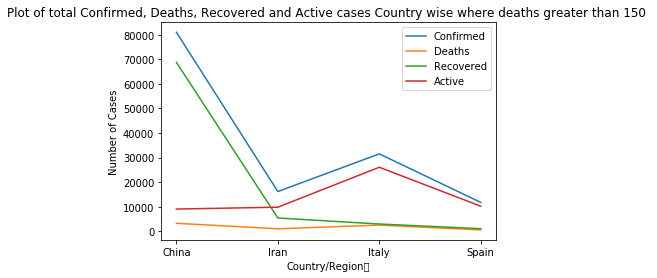

<Figure size 360x360 with 0 Axes>

In [71]:
plt.plot(covid_data_group_country_subset['Country/Region'], 
         covid_data_group_country_subset['Confirmed'], 
         label = "Confirmed")
plt.plot(covid_data_group_country_subset['Country/Region'], 
         covid_data_group_country_subset['Deaths'], 
         label = "Deaths")
plt.plot(covid_data_group_country_subset['Country/Region'], 
         covid_data_group_country_subset['Recovered'], 
         label = "Recovered")
plt.plot(covid_data_group_country_subset['Country/Region'], 
         covid_data_group_country_subset['Active'], 
         label = "Active")
plt.xlabel('Country/Region	')
# Set the y axis label of the current axis.
plt.ylabel('Number of Cases')
# Set a title of the current axes.
plt.title('Plot of total Confirmed, Deaths, Recovered and Active cases Country wise where deaths greater than 150 ')
# show a legend on the plot
plt.legend()
plt.figure(figsize=(5,5))
plt.show()